# *Deliverable 3*: k Nearest Neighbors

* Import dataset and necessary libraries
<br><br>  
* Split the data
<br><br>  
* Train the model
<br><br>
* Evaluate the model

## Import dataset and necessary libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os 

# Load the dataset
nb_path = os.path.abspath('')
file_path = os.path.join(nb_path, '../../data/df_cleaned.csv')
df = pd.read_csv(file_path)

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,outlier,car brand,model,anomaly_score,multivariate_outlier,car_name_encoded,mpg_classes
0,11.0,8.0,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega,Normal,oldsmobile,omega,1,Normal,16,0
1,11.0,8.0,400.0,150.0,4997.0,14.0,73,1,chevrolet impala,Normal,chevrolet,impala,1,Normal,5,0
2,11.0,8.0,318.0,210.0,4382.0,13.5,70,1,dodge d200,Normal,dodge,d200,1,Normal,8,0
3,12.0,8.0,350.0,180.0,4499.0,12.5,73,1,oldsmobile vista cruiser,Normal,oldsmobile,vista cruiser,1,Normal,16,0
4,12.0,8.0,400.0,167.0,4906.0,12.5,73,1,ford country,Normal,ford,country,1,Normal,10,0


In [2]:
# split the data into features and target values
x_features = ['cylinders', 'displayments', 'horsepower', 'weight', 'acceleration']
X = df[x_features]
y = df['mpg_classes']

In [3]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split the dataset

In [4]:
# Split the data into train set and test set with test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify = y, random_state=42)

## Train a KNeighborsClassifier model

In [5]:
knn = KNeighborsClassifier()
#train the model
knn.fit(X_train, y_train)
# get the score on the test set
test_score = knn.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.3f}")

Test Accuracy: 0.717


## Find the best value for k

In [6]:
k_values = range(1, 20)
knn_accuracies = []
# fit/score with different number of neighbors
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'{k} --> {knn.score(X_test, y_test)}')
    knn_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

1 --> 0.7256637168141593
2 --> 0.6991150442477876
3 --> 0.6902654867256637
4 --> 0.7522123893805309
5 --> 0.7168141592920354
6 --> 0.7168141592920354
7 --> 0.7079646017699115
8 --> 0.7079646017699115
9 --> 0.6902654867256637
10 --> 0.6991150442477876
11 --> 0.7256637168141593
12 --> 0.7079646017699115
13 --> 0.6814159292035398
14 --> 0.6814159292035398
15 --> 0.7079646017699115
16 --> 0.6991150442477876
17 --> 0.7079646017699115
18 --> 0.6814159292035398
19 --> 0.672566371681416


## Plot accuracies scores

Best accuracy 75.22% for k=4


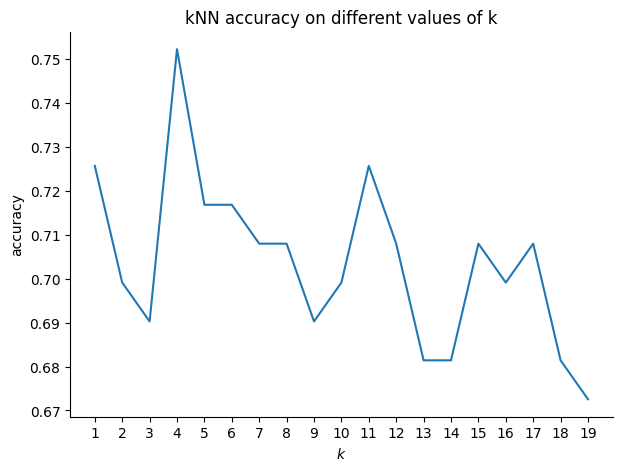

In [7]:
# Plot accuracies
fig = plt.figure(figsize=(7, 5))

ax = plt.subplot(111)
ax.plot(range(1, 20, 1), knn_accuracies)

# aesthetic parameters
ax.set_xticks(range(1, 20))
ax.set_xlabel('$k$')
ax.set_ylabel('accuracy')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('kNN accuracy on different values of k')

print(f'Best accuracy {max(knn_accuracies) * 100:.2f}% for k={list(range(1, 20))[np.argmax(knn_accuracies)]}')

In [8]:
best_k = k_values[np.argmax(knn_accuracies)]
best_accuracy = max(knn_accuracies)
print(f"Best Accuracy: {best_accuracy * 100:.2f}% achieved at k={best_k}")

Best Accuracy: 75.22% achieved at k=4


## Evaluate the model


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        39
           1       0.62      0.66      0.64        38
           2       0.81      0.69      0.75        36

    accuracy                           0.75       113
   macro avg       0.75      0.75      0.75       113
weighted avg       0.75      0.75      0.75       113


Confusion Matrix:


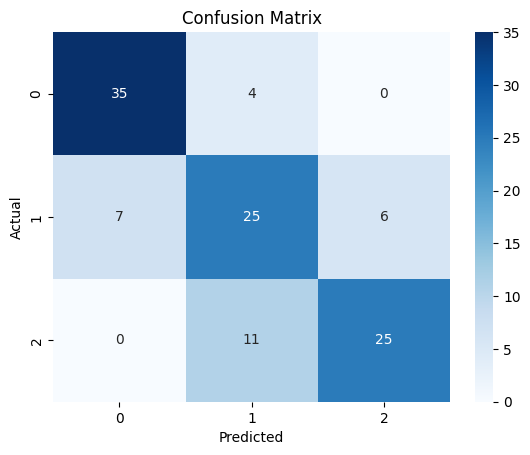

In [9]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()